**1. Import and Install dependences**
- Tensflow opencv-python mediapipe sklearn matplotlib

**2. Keypoints Using MP Holistic**

In [14]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt 
import os
import mediapipe as mp
import numpy
import time


In [15]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [16]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, results

In [17]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [18]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=1),
                              mp_drawing.DrawingSpec(color = (80, 256, 121), thickness = 1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=2),
                              mp_drawing.DrawingSpec(color = (80, 106, 121), thickness = 2, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=2),
                              mp_drawing.DrawingSpec(color = (30, 206, 171), thickness = 2, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=2),
                              mp_drawing.DrawingSpec(color = (80, 76, 91), thickness = 1, circle_radius=1))


In [19]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    print("Error: Could not open video capture.")
    exit()
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while True:
        ret , frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [20]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
draw_landmarks(frame, results)

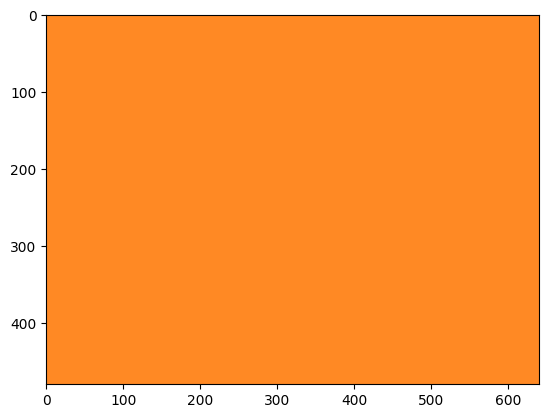

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

**3. Extra Keypoint Values**

In [21]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [22]:
len(pose)

0

In [23]:
pose = np.array([res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark).flatten()

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
pose

array([<generator object <genexpr> at 0x0000022326EDA420>], dtype=object)

In [ ]:
pose.shape

(1,)

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

**4. Setup Folders for Collection**

In [8]:
import cv2
import time

# Khởi tạo đối tượng video capture
cap = cv2.VideoCapture(0)

# Kiểm tra xem camera có mở thành công không
if not cap.isOpened():
    print("Error: Could not open video capture.")
    exit()
exit_flag = False
name = "Em_trai" # Tên ký hiệu sửa tại đây
# Lấy thời gian bắt đầu quay
for i in range(1,21):# Số lượng video
    # Định nghĩa codec và tạo đối tượng VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(f'./Video_dataset/{name}/{i}.avi', fourcc, 20.0, (640, 480))

    # Đặt thời gian quay video (tính bằng giây)
    duration = 2

    ret, frame = cap.read()
    if not ret:
            print("Error: Failed to capture image.")
            break
    cv2.putText(frame, f'video{i}', (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow("Recording", frame)
    cv2.waitKey(1000)
    cv2.putText(frame, f'Video recording will start in 1 second', (60, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow("Recording", frame)
    cv2.waitKey(1000)
    # Vòng lặp để quay video trong 2 giây
    start_time = time.time()
    while (time.time() - start_time) < duration:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            break
        # Ghi khung hình vào file video
        out.write(frame)
        
        # Hiển thị khung hình
        cv2.imshow("Recording", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            exit_flag = True
            break

    # Kiểm tra nếu phím 'q' được nhấn để thoát vòng lặp ngoài
    if exit_flag:
        break

# Giải phóng các đối tượng
cap.release()
out.release()
cv2.destroyAllWindows()

print("Video đã được lưu vào file 'output.avi'")


Video đã được lưu vào file 'output.avi'


**5. Collect Keypoint Values for Traning and Testing**